In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [58]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [59]:
# 1 Checking for null values in thne columns
features_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>=1]
if not features_with_nan:
    print(0)
for i in features_with_nan:
    print(i)
    print(i,np.round(data[i].isnull().mean(),4),'% missing values')

0


In [60]:
# Numerical fetaures
num_features=[feature for feature in data.columns if data[feature].dtypes!='O']
print(num_features)

['Hours', 'Scores']


In [61]:
# categorical features
cat_features=[feature for feature in data.columns if data[feature].dtypes=='O']

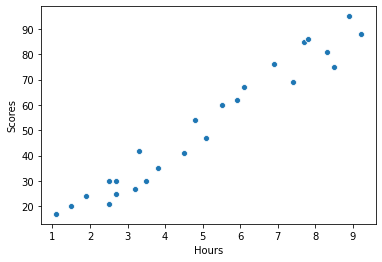

In [62]:
# analyzing numerical features using scatter plot in seaborn
sns.scatterplot(data=data,x='Hours',y='Scores')


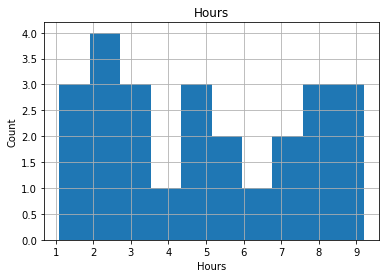

In [63]:
# analyzing the distribution of numerical features with histogram  of pandas
dataset=data.copy()
dataset['Hours'].hist(bins=10)
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Hours')
plt.show()

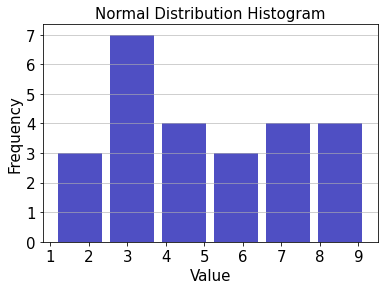

In [64]:
# Histogram using matplotlib
plt.figure(figsize=[6,4])
n, bins, patches = plt.hist(x=data['Hours'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Normal Distribution Histogram',fontsize=15)
plt.show()

In [29]:
# performinng log noraml transformation
dataset=data.copy()
for feature in ['Hours']:
    if 0 in data[feature].unique():
        pass
    else:
        dataset[feature]=dataset[feature]**(1/2)
        dataset['Scores']=dataset['Scores']**(1/2)

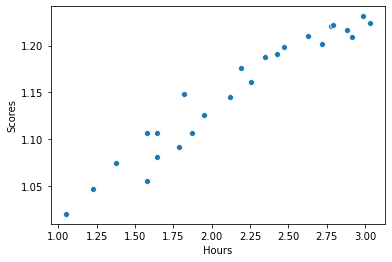

In [30]:
# Scatter plot after log noramal transformation
sns.scatterplot(data=dataset,x='Hours',y='Scores')

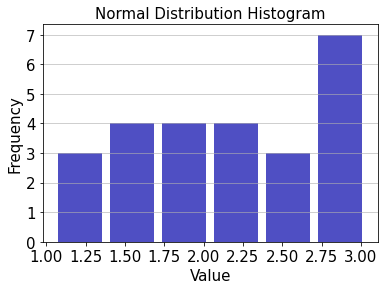

In [31]:
plt.figure(figsize=[6,4])
n, bins, patches = plt.hist(x=dataset['Hours'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Normal Distribution Histogram',fontsize=15)
plt.show()

In [65]:
# Preparing train and test data
target=data['Scores']
df_train=data.drop(['Scores'],axis=1)

In [66]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(df_train,target,test_size=0.3,random_state=0)

In [69]:
# modelling
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics

In [70]:
reg=LinearRegression()
reg.fit(x_train,y_train)
predict=reg.predict(x_test)
metrics.mean_squared_error(y_test,predict)

22.96509721270043

In [71]:
reg=AdaBoostRegressor()
reg.fit(x_train,y_train)
predict=reg.predict(x_test)
metrics.mean_squared_error(y_test,predict)

47.794390589569176

In [72]:
reg=XGBRegressor()
reg.fit(x_train,y_train)
predict=reg.predict(x_test)
metrics.mean_squared_error(y_test,predict)

78.85723544848133

In [73]:
reg=RandomForestRegressor()
reg.fit(x_train,y_train)
predict=reg.predict(x_test)
metrics.mean_squared_error(y_test,predict)

42.5395611111111

In [74]:
reg=svm.SVR()
reg.fit(x_train,y_train)
predict=reg.predict(x_test)
metrics.mean_squared_error(y_test,predict)

447.61127117674295

In [75]:
#---Using Linear Regression--------
dic_test={'Hours':[9.25]}
df_test=pd.DataFrame.from_dict(dic_test)
df_test.head()
reg.fit(df_train,target)
predict=reg.predict(df_test)

In [49]:
result=pd.DataFrame({'Id':1,'Scores':predict})

In [50]:
result.head()

,Id,Scores
0,1,1.411528


In [53]:
target.head()

0    1.113344
1    1.348111
2    1.192660
3    1.462674
4    1.224128
Name: Scores, dtype: float64